### Dependencies

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import random
import urllib.parse

### Database information

In [2]:
database = "Employees_db"
username = 'Enter username'
password = 'Enter password'
host = 'localhost'
port = 5432

### Parse password (Optional)

In [3]:
# Use code below if your password has special characters 
# password = urllib.parse.quote_plus('enter password')

### Create and Connect to Engine

In [4]:
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database}") 
conn = engine.connect()

### Employes Most common salary ranges Query

In [5]:
# Query All Salary records per Employees
employees = pd.read_sql("SELECT e.emp_no, e.first_name, e.last_name, s.salary FROM employees AS e INNER JOIN salaries AS s ON e.emp_no = s.emp_no", conn)
employees.head()

,emp_no,first_name,last_name,salary
0,57444,Berry,Babb,48973
1,13616,Perry,Lorho,40000
2,240129,Roddy,Karnin,43548
3,427958,Feixiong,Poujol,63377
4,35916,Wonhee,Talmon,40000


#### Most common salaries Histogram Plot

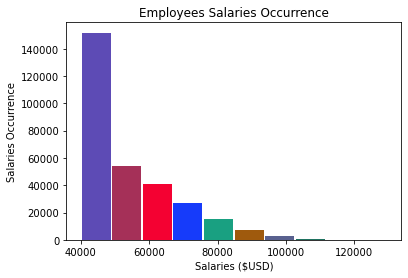

In [6]:
n, m, patches = plt.hist(employees.salary, bins=10, rwidth=0.95)

# Random color selection
for i in range(len(n)):
    color = f"#{random.randrange(0x1000000):06x}"
    patches[i].set_fc(color)
    
plt.xlabel('Salaries ($USD)')
plt.ylabel('Salaries Occurrence')
plt.title ('Employees Salaries Occurrence')
plt.savefig('plots/Histogram_Common_Salaries.png', bbox_inches='tight')

### Salaries by Title Query

In [7]:
salaries = pd.read_sql("SELECT t.title, AVG(s.salary) AS salary_avg FROM employees AS e \
                        INNER JOIN salaries AS s ON e.emp_no = s.emp_no INNER JOIN Titles AS t \
                        ON t.title_id = e.emp_title_id GROUP BY t.title", conn)
salaries.head(10)

,title,salary_avg
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


#### Salaries by Title Bar Plot

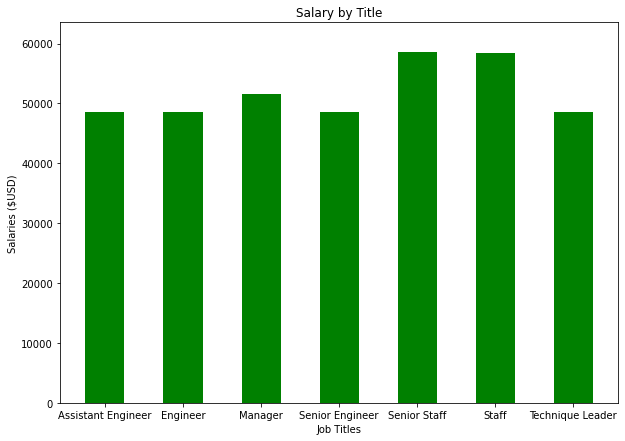

In [8]:
x_axis = np.arange(len(salaries))
tick_locations = [value for value in x_axis]
fig = plt.figure(figsize=(10,7))
plt.bar(x_axis, salaries.salary_avg, width=0.5, color='green')
plt.ylim(0, max(salaries.salary_avg) + 5000)
plt.title('Salary by Title')
plt.xticks(tick_locations, salaries.title)
plt.xlabel('Job Titles')
plt.ylabel('Salaries ($USD)')
plt.savefig('plots/BarPlot_SalariesByTitle.png', bbox_inches='tight')